In [13]:
import random
import pandas as pd

In [14]:
TOTAL_MOVEMENTS = 1390
TOTAL_SIMS = 50000

AVERAGE_TRACTOR_SPEED = 25.4 #kmph

IDLE_MINS_AT_SOURCE_MIN = 5
IDLE_MINS_AT_SOURCE_MAX = 10

IDLE_MINS_AT_DIGESTER_MIN = 2
IDLE_MINS_AT_DIGESTER_MAX = 5

IDLE_LOAD_MODE_VALUE = 0.75  #kg C02 per min
UNLOADED_LOAD_MODE_VALUE_MIN = 0.75  #kg C02 per min
UNLOADED_LOAD_MODE_VALUE_MAX = 1.5  #kg C02 per min
LOADED_LOAD_MODE_VALUE_MIN = 1.5 #kg CO2 per min
LOADED_LOAD_MODE_VALUE_MAX = 2.3 #kg CO2 per min

In [15]:
SOURCE_DISTANCE = [3,5,8,10] #kms from digester

def get_rnd_distance():
    
    return random.choice(SOURCE_DISTANCE)        

In [16]:
def get_rnd_value_from_range(lower, upper):
    
    return random.uniform(lower, upper)

In [17]:
def main():
    
    df = pd.DataFrame(columns=['CO2', 'Distance'])
    for sim in range(TOTAL_SIMS):

        total_co2 = 0
        total_dist = 0
        for movement in range(TOTAL_MOVEMENTS):
            
            # get distance of supply farm 3,5,8,10 kms
            movement_distance = get_rnd_distance()
            
            # work out travel time based on ave. 25 kmph
            trip_time_one_way = movement_distance / (AVERAGE_TRACTOR_SPEED/60)
            
            #get a random value for the emissions under load
            loaded_emission_val = get_rnd_value_from_range(LOADED_LOAD_MODE_VALUE_MIN,LOADED_LOAD_MODE_VALUE_MAX)
            unloaded_emission_val = get_rnd_value_from_range(UNLOADED_LOAD_MODE_VALUE_MIN,UNLOADED_LOAD_MODE_VALUE_MAX)
                        
            idle_time_at_source = get_rnd_value_from_range(IDLE_MINS_AT_SOURCE_MIN,IDLE_MINS_AT_SOURCE_MAX)
            
            idle_time_at_digester = get_rnd_value_from_range(IDLE_MINS_AT_DIGESTER_MIN,IDLE_MINS_AT_DIGESTER_MAX)
            
            # calculate the total emmsions for this combined trip to and from the digester
            # assuming one way loading
            movement_co2 = ( (idle_time_at_source * IDLE_LOAD_MODE_VALUE) + 
                            (trip_time_one_way * loaded_emission_val) +
                            (idle_time_at_digester * IDLE_LOAD_MODE_VALUE) +
                            (trip_time_one_way * unloaded_emission_val) )
            
            total_co2 += movement_co2
            total_dist += movement_distance * 2 # trip there and back
             
        df.loc[0 if pd.isnull(df.index.max()) else df.index.max() + 1] = [total_co2,total_dist]

    print(df.describe())
    df.describe().to_csv("emmisions.csv")
    
    # CO2 emissions Histogram
    ax =df.hist(column='CO2', bins=20,color='#86bf91', zorder=2)
    ax = ax[0]
    for x in ax:

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title("")

        # Set x-axis label
        x.set_xlabel("CO2 Emissions Kg", labelpad=10, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel("Frequency", labelpad=10, weight='bold', size=12)
    

    # Distance Histogram
    ax = df.hist(column='Distance',bins=20)
    ax = ax[0]
    for x in ax:

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title("")

        # Set x-axis label
        x.set_xlabel("Distance Km", labelpad=10, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel("Frequency", labelpad=10, weight='bold', size=12)


                CO2      Distance
count  50000.000000  50000.000000
mean   76030.364624  18070.460160
std      748.920799    202.122316
min    73041.244146  17218.000000
25%    75524.665829  17934.000000
50%    76030.460861  18070.000000
75%    76534.703520  18208.000000
max    79323.602648  18984.000000


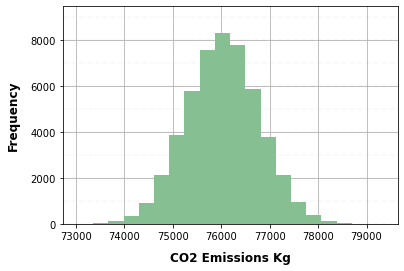

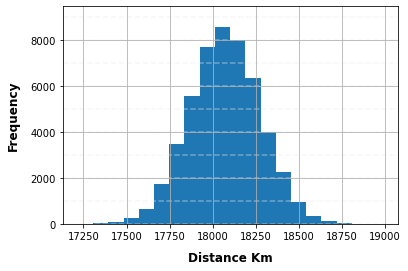

In [18]:
main()